# Project 3: Reinforcement Learning and Inverse Reinforcement Learning

In [4]:
# Importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cvxopt import solvers, matrix

Question 1: (10 points) For visualization purpose, generate heat maps of Reward function 1 and Reward function 2. For the heat maps, make sure you display the coloring scale. You will have 2 plots for this question

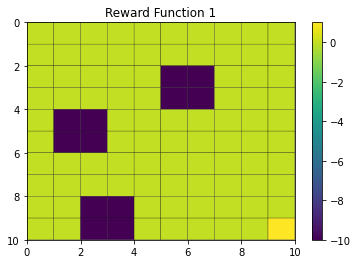

In [40]:
# Reward function 1
reward_fnx1 = np.array([[0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,-10,-10,0,0,0],
          [0,0,0,0,0,-10,-10,0,0,0],
          [0,-10,-10,0,0,0,0,0,0,0],
          [0,-10,-10,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],
          [0,0,-10,-10,0,0,0,0,0,0],
          [0,0,-10,-10,0,0,0,0,0,1]])

# Visualizing the reward
plt.pcolor(reward_fnx1,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Reward Function 1")
plt.show()

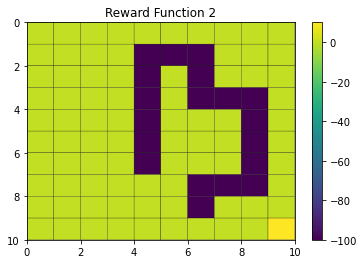

In [4]:
# Reward function 2
reward_fnx2 = np.array([[0,0,0,0,0,0,0,0,0,0], 
         [0,0,0,0,-100,-100,-100,0,0,0], 
         [0,0,0,0,-100,0,-100,0,0,0], 
         [0,0,0,0,-100,0,-100,-100,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,0,0,-100,-100,-100,0],
         [0,0,0,0,0,0,-100,0,0,0],
         [0,0,0,0,0,0,0,0,0,10]])

# Visualizing the reward
plt.pcolor(reward_fnx2,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Reward Function 2")
plt.show()

Question 2: (40 points) Create the environment of the agent using the information provided in section 2. To be specific, create the MDP by setting up the state-space, action set, transition probabilities, discount factor, and reward function. For creating the environment, use the following set of parameters:

    • Number of states = 100 
    • Number of actions = 4
    • w = 0.1
    • Discount factor = 0.8
    • Reward function 1

After you have created the environment, then write an optimal state-value function that takes as input the environment of the agent and outputs the optimal value of each state in the grid. For the optimal state-value function, you have to implement the Initialization (lines 2-4) and Estimation (lines 5-13) steps of the Value Iteration algorithm. For the estimation step, use ε = 0.01. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal value of that state. In this part of question, you should have 1 plot.

In [5]:
# Setting up the environment of the MDP

# Initialize the state space
k=0
state_space = np.zeros((10,10))
for i in range(0,10):
    for j in range(0,10):
        state_space[j][i]=k
        k+=1
        
# probability transition matrix for moving from one state to another
def state_transition_probabilities(w):
    P_up= np.zeros((100,100)) #Up
    P_down= np.zeros((100,100)) #Down
    P_left= np.zeros((100,100)) #Left
    P_right= np.zeros((100,100)) #Right
 
    for i in range(0,100):
        if(i%10==0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i-1]=1-w+w/4
        if(i-10<0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i-10]=w/4
        if(i+10>99):
            P_up[i][i]+=w/4
        else:
            P_up[i][i+10]=w/4
        if((i+1)%10==0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i+1]=w/4
        if(i%10==0):                     
            P_up[i][i]+=1-w   
        
    for i in range(0,100):
        if(i%10==0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i-1]=w/4
        if(i-10<0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i-10]=w/4
        if(i+10>99):
            P_down[i][i]+=w/4
        else:
            P_down[i][i+10]=w/4
        if((i+1)%10==0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i+1]=1-w+w/4
        if((i+1)%10==0):                      
            P_down[i][i]+=1-w
    
    for i in range(0,100):
        if(i%10==0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i-1]=w/4
        if(i-10<0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i-10]=1-w+w/4
        if(i+10>99):
            P_left[i][i]+=w/4
        else:
            P_left[i][i+10]=w/4
        if((i+1)%10==0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i+1]=w/4
        if(i-10<0):                      
            P_left[i][i]+=1-w

    for i in range(0,100):
        if(i%10==0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i-1]=w/4
        if(i-10<0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i-10]=w/4
        if(i+10>99):
            P_right[i][i]+=w/4
        else:
            P_right[i][i+10]=1-w+w/4
        if((i+1)%10==0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i+1]=w/4
        if(i+10>99):                      
            P_right[i][i]+=1-w

    return P_up, P_down, P_left, P_right

In [6]:
# Value iteration algorithm

def value_iteration(state_space,reward_fnx,P_up, P_down, P_left, P_right,w,gamma,epsilon):
    current_state=np.zeros(100)
    delta=np.inf
    r = (reward_fnx.T).ravel()
    steps = 0
    while(delta>epsilon):
        delta=0
        prev=np.copy(current_state)
        for s in range(0,100):
            up=np.sum(P_up[s]*(r+gamma*prev))
            down=np.sum(P_down[s]*(r+gamma*prev))
            left=np.sum(P_left[s]*(r+gamma*prev))
            right=np.sum(P_right[s]*(r+gamma*prev))
            current_state[s]=max(up,down,right,left)
            delta=max(delta,abs(prev[s]-current_state[s]))
        steps+=1
    copy_of_state = current_state.copy()
    current_state = np.transpose(current_state.reshape(10,10))
    return current_state, steps,up,down,left,right,copy_of_state


def value_iteration_with_intervals(state_space,reward_fnx,P_up, P_down, P_left, P_right,w,gamma,epsilon,optimal_steps=32):
    current_state=np.zeros(100)
    snapshot = []
    delta=np.inf
    r = (reward_fnx.T).ravel()
    intervals = np.round(np.linspace(1,optimal_steps-1,5))
    steps = 0
    while(delta>epsilon):
        if steps in intervals:
            current_state_ = np.copy(current_state)
            current_state_ = np.transpose(current_state_.reshape(10,10))
            snapshot.append(current_state_) 
        delta=0
        prev=np.copy(current_state)
        for s in range(0,100):
            up=np.sum(P_up[s]*(r+gamma*prev))
            down=np.sum(P_down[s]*(r+gamma*prev))
            left=np.sum(P_left[s]*(r+gamma*prev))
            right=np.sum(P_right[s]*(r+gamma*prev))
            current_state[s]=max(up,down,right,left)
            delta=max(delta,abs(prev[s]-current_state[s]))
        steps+=1
    return snapshot

In [7]:
# Computing the optimal state-value using the value iteration algorithm

# Parameters
w = 0.1
gamma = 0.8
epsilon = 0.01

# Convergence
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
state, steps, _, _, _, _, _ = value_iteration(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

Number of steps needed to converge: 22


Text(0.5, 1.0, 'Optimal state values for Reward function 1 (After Iterations = 22)')

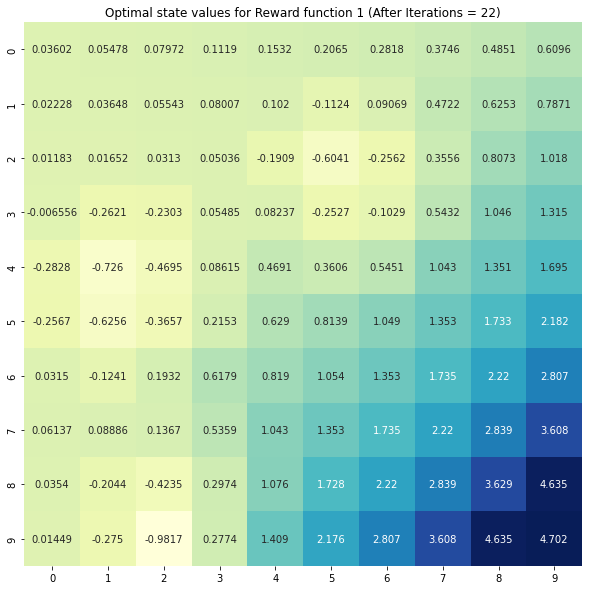

In [8]:
# Plotting optimal value

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)
plt.title("Optimal state values for Reward function 1 (After Iterations = 22)")

Let’s assume that your value iteration algorithm converges in N steps. Plot snapshots of state values in 5 different steps linearly distributed from 1 to N. Report N and your step numbers. What observations do you have from the plots?

5


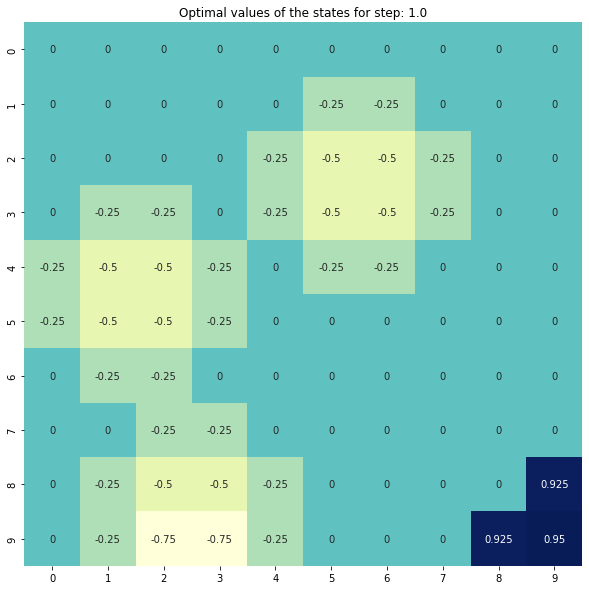

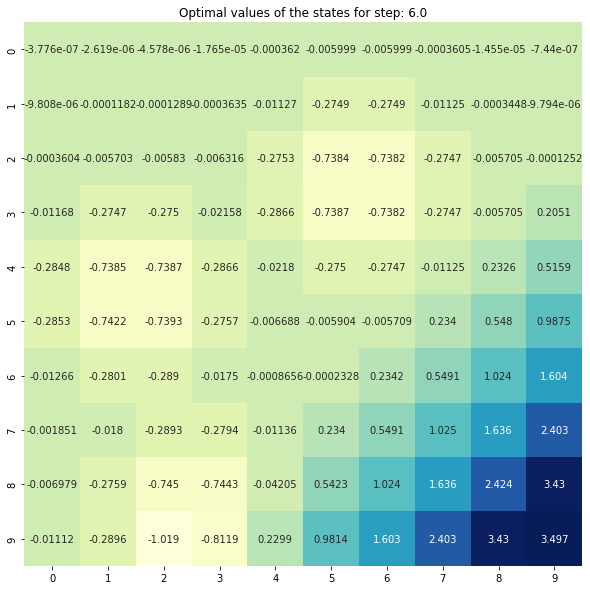

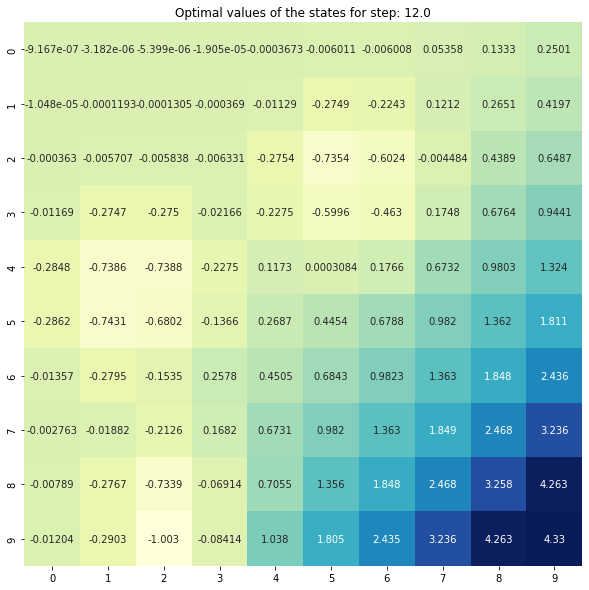

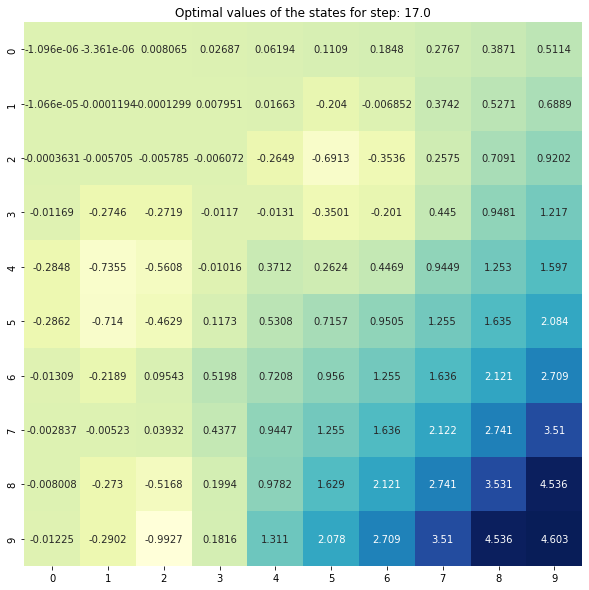

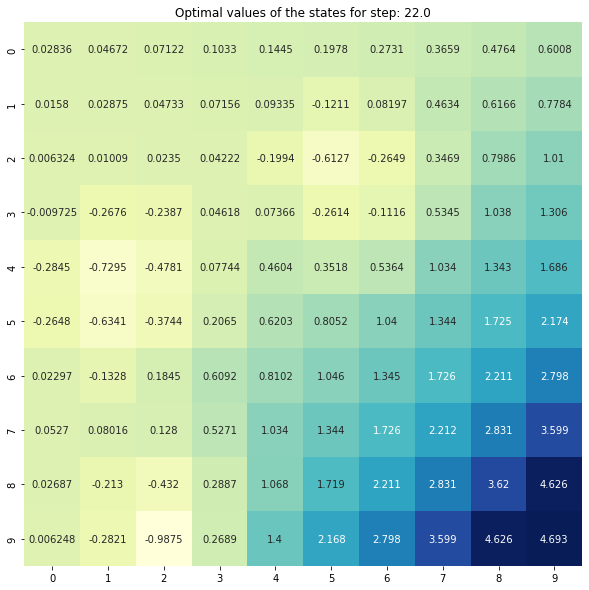

In [9]:
# Snapshots of the state-value until convergence
snapshots = value_iteration_with_intervals(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon,optimal_steps=22)
print(len(snapshots))

intervals = np.round(np.linspace(1, 22, 5))
for k in range(len(snapshots)):
    N = intervals[k]
    state = snapshots[k]
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)
    plt.title("Optimal values of the states for step: "+str(N))
    plt.show()

For observation of the above plots, it appears that as the iterations increase , there is more of a gradient effect towards the bottom right corner. There, the grid starts to shift to higher optimal state values to favor the corner of the reward function where the reward is the highest. Those values of the reward function where the reward is the lowest have lower optimal state values than the rest of the grid.

Question 3: (5 points) Generate a heat map of the optimal state values across the 2-D grid. For generating the heat map, you can use the same function provided in the hint earlier (see the hint after question 1).

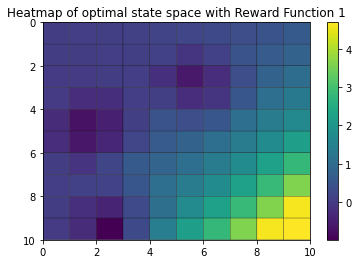

In [10]:
plt.pcolor(state,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state space with Reward Function 1")
plt.show()

Question 4: (15 points) Explain the distribution of the optimal state values across the 2-D grid. (Hint: Use the figure generated in question 3 to explain)

From the heatmap, we can see that the highest values in the optimal state space are where the reward function has the highest reward, that being the bottom right corner. The lowest values in the optimal state space are where the reward function has the lowest reward, that being the three 2x2 squares. As the location in the grid approaches the bottom right corner where the reward is the highest, we can see the optimal state values start to increase gradually in a gradient to the highest value.  

If the agent is in the top left or in the three 2x2 squares, there's little value in being in this state, while if the agent is in the bottom right, there is great value in staying put.

Question 5: (20 points) Implement the computation step of the value iteration algorithm (lines 14-17) to compute the optimal policy of the agent navigating the 2-D state-space. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The optimal actions should be displayed using arrows. Does the optimal policy of the agent match your intuition? Please provide a brief explanation. Is it possible for the agent to compute the optimal action to take at each state by observing the optimal values of it’s neighboring states? In this question, you should have 1 plot.

In [11]:
## Function for plotting the optimal actions at each state in the grid
## The function takes as input the matrix containing optimal actions
## and plots the actions for each state on the grid

def plot_arrow(action_matrix):
    
    fig, ax = plt.subplots()
    num_rows = len(action_matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = action_matrix[j][i]
            arrow = ''
            if(c == 0):
                arrow = u'↑'
            elif(c == 1):
                arrow = u'↓'
            elif(c == 2):
                arrow = u'←'
            else:
                arrow = u'→'
            
            ax.text(i + 0.5, j + 0.5, arrow, va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()


def find_policy(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon):
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (reward_fnx.T).ravel()
    _,_,up,down,left,right,current_state = value_iteration(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon)
    for s in range(0,100):
        up=np.sum(P_up[s]*(r+gamma*current_state))
        down=np.sum(P_down[s]*(r+gamma*current_state))
        left=np.sum(P_left[s]*(r+gamma*current_state))
        right=np.sum(P_right[s]*(r+gamma*current_state))
        arr=[up,down,left,right]
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    plot_arrow(arrows)
    return policy

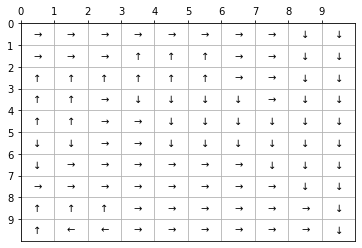

In [12]:
policy = find_policy(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)

The optimal policy does match intuition. As can be seen for the upper left corners of all of the regions where the reward function is -10, the best policy for the agent is to go up to be out of those regions. The agent is avoiding going over the other squares of these regions that would reduce its reward. Also, if you follow a path from a given square, the path goes to the highest reward value of 1 in the bottom right.

It may be possible for the agent to compute the optimal action by observing the optimal values of its neighboring states, although it must take caution to weigh its neighbors appropriately so as to not choose a poor action. This can be accomplished with the discount factor by taking into account long-term and near-term future states in calculating the values.

Question 6: (10 points) Modify the environment of the agent by replacing Reward function 1 with Reward function 2. Use the optimal state-value function implemented in question 2 to compute the optimal value of each state in the grid. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal value of that state. In this question, you should have 1 plot.

In [47]:
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
state, steps, _, _, _, _, _ = value_iteration(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

Number of steps needed to converge: 32


Text(0.5, 1.0, 'Optimal state values for Reward function 2(After Iterations = 32)')

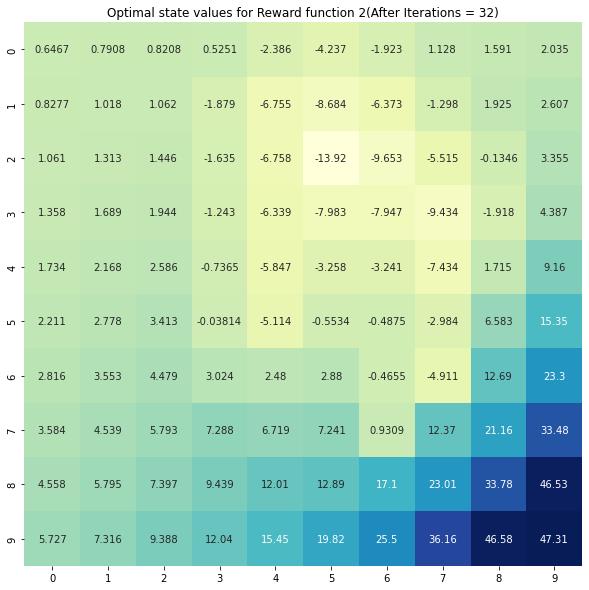

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(state, annot=True, fmt='.4g', cmap="YlGnBu", cbar=False)
plt.title("Optimal state values for Reward function 2(After Iterations = 32)")

Question 7: (20 points) Generate a heat map of the optimal state values (found in question 6) across the 2-D grid. For generating the heat map, you can use the same function provided in the hint earlier. Explain the distribution of the optimal state values across the 2-D grid. (Hint: Use the figure generated in this question to explain)

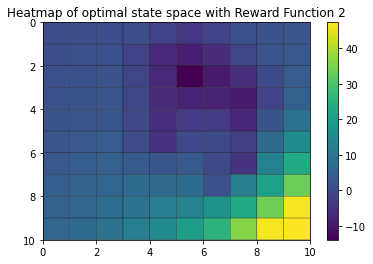

In [49]:
plt.pcolor(state,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state space with Reward Function 2")
plt.show()

The distribution of the optimal state values look to correspond pretty well to the reward function. The square surrounded by -100 for the reward function has the least optimal state value. Also, the squares closest to the -100 reward values are closer to the least value. The blob in the middle has the lowest values due to the concentration of negative states. The squares closest to the highest reward value of 10 at the bottom right have the highest optimal state values as well.

Question 8: (20 points) Implement the computation step of the value iteration algorithm (lines 14-17) to compute the optimal policy of the agent navigating the 2-D state-space. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The optimal actions should be displayed using arrows. Does the optimal policy of the agent match your intuition? Please provide a brief explanation. In this question, you should have 1 plot.

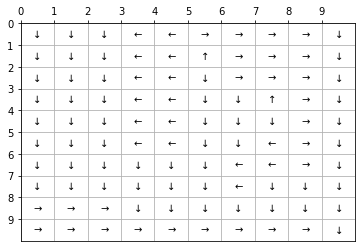

In [50]:
policy = find_policy(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)

Similar to the plot for reward function 1, here all of the paths for all of the squares make their way to the highest reward function value at the bottom right. Also, similar to the plot for reward function 1, the policy for the agent minimizes the number of squares traversed where the reward function is set to -100. For example, if the agent starts at the square with the least optimal state value in the heatmap, then it goes all the way down before going to the right for the highest reward square so that it doesn't go over an -100 reward values.

Question 9:(20 points) Change the hyper parameter w to 0.6 and find the optimal policy map similar to previous question for reward functions. Explain the differences you observe. What do you think about value of new w compared to previous value? Choose the w that you think give rise to better optimal policy and use that w for the next stages of the project.

Number of steps needed to converge: 19


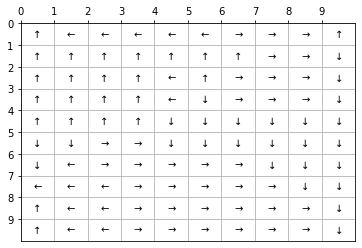

In [23]:
# w = 0.6 with Reward function 1

# Parameters
w = 0.6
gamma = 0.8
epsilon = 0.01

# Convergence
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
state, steps, _, _, _, _, _ = value_iteration(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

policy = find_policy(state_space,reward_fnx1,P_up,P_down,P_left,P_right,w,gamma,epsilon)

Number of steps needed to converge: 27


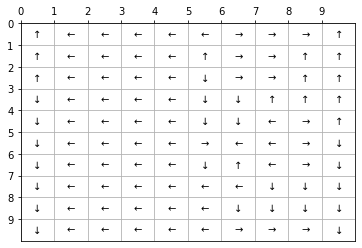

In [21]:
# w = 0.6 with Reward function 2

# Parameters
w = 0.6
gamma = 0.8
epsilon = 0.01

# Convergence
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
state, steps, _, _, _, _, _ = value_iteration(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)
print("Number of steps needed to converge:", steps)

policy = find_policy(state_space,reward_fnx2,P_up,P_down,P_left,P_right,w,gamma,epsilon)

Using w = 0.6 with both reward functions, we can see that the arrows do not reflect the best path to lead to the bottom left corner where the reward is the highest. Especially along the edges or in areas where there is no direct conflict due to a low reward, the optimal actions seem to be pointing away from our so-called "end goal". This is not optimal at all. Also, there are two squares in the policy map for reward function 2 that point towards each other, meaning an agent would get stuck going between the two. For these reasons, we will proceed with using w = 0.1 moving forward as we did previously.  
  
Also, after coordinating during the discussion session, w can be thought of as the influence of wind in the agent making a random choice. If w is large, then there is more chance that a random direction is taken. If parameter is high, then it won't give as good results due to increased randomness.

Question 10: (10 points) Express c, x, D, b in terms of $R$, $P_a$, $P_{a1}$ , $t_i$, $u$, $λ$ and $R_{max}$

$C = \begin{bmatrix}0 & \mathbb{1} & -\lambda\mathbb{1} & 0 \end{bmatrix}$  
$X = \begin{bmatrix} R & T & U \end{bmatrix}$  
$D = \begin{bmatrix} -(P_{a_1} - P_a)(I - \gamma P_{a_1})^{-1} & I & 0 \\
-(P_{a_1} - P_a)(I - \gamma P_{a_1})^{-1} & 0 & 0 \\
-I & 0 & -I \\
I & 0 & -I \\
-I & 0 & 0 \\
I & 0 & 0\end{bmatrix}$  
$b = \begin{bmatrix} 0 & 0 & 0 & 0 & R_{max} & -R_{max}\end{bmatrix}$

Question 11: (30 points) Sweep λ from 0 to 5 to get 500 evenly spaced values for λ. For each value of λ compute $O_A(s)$ by following the process described above. For this problem, use the optimal policy of the agent found in question 5 to fill in the $O_E(s)$ values. Then use equation 3 to compute the accuracy of the IRL algorithm for this value of λ. You need to repeat the above process for all 500 values of λ to get 500 data points. Plot λ (x-axis) against Accuracy (y-axis). In this question, you should have 1 plot

In [42]:
# Computing the optimal policy and not plot it
def find_policy_irl(state_space, reward_fnx, P_up, P_down, P_left, P_right, w, gamma, epsilon): 
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (reward_fnx.T).ravel()
    _,_,up,down,left,right,current_state = value_iteration(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon)
    for s in range(0,100):
        up=np.sum(P_up[s]*(r+gamma*current_state))
        down=np.sum(P_down[s]*(r+gamma*current_state))
        left=np.sum(P_left[s]*(r+gamma*current_state))
        right=np.sum(P_right[s]*(r+gamma*current_state))
        arr=[up,down,left,right]
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    return policy, arrows

# Prepare the matrices for the LP solver
def make_D_matrix(o_e, p, ind, gamma, lam, maximum):    
    #initialize empty matricies
    I = np.identity(100)
    zero = np.zeros((300,100))
    identity = np.zeros((300,100))

    counter = 0
    for i in range(100):
        best_p = int(o_e[ind][i])
        for j in range(len(p)):
            if(best_p == j):
                continue
            pa1 = p[best_p]
            pa = p[j]
            inv = np.linalg.inv(I - gamma*pa1)
            zero[counter, :] = np.matmul((pa1[i] - pa[i]).reshape(1,100), inv)
            identity[counter, i] = 1
            counter = counter + 1
    #Initialize the matricies    
    ones = np.zeros((100,1)) + 1
    zero = -zero

    reward = np.vstack((zero, zero, -I, I, I, -I))
    c = np.vstack((np.zeros((100,1)), ones, -lam*ones))
    D = np.hstack((reward, np.vstack((identity, np.zeros((700,100)))), np.vstack((np.zeros((600,100)), -I, -I, np.zeros((200,100))))))

    Rmax = np.zeros((100,1)) + maximum[ind]
    b = np.vstack((np.zeros((800,1)), Rmax, Rmax))
    return c, D, b

# Computing the accuracy
def accuracy(policy_pred,p):
    best_acc = 0
    for i in range(len(np.transpose(policy_pred).flatten())):
        if (np.transpose(policy_pred).flatten()[i] == p[i]):
            best_acc = best_acc + 1
    best_acc = best_acc/100.0
    return best_acc

In [52]:
# Computing the optimal expert policy using the reward functions 1 and 2

w = 0.1
gamma = 0.8
epsilon = 0.01

k=0
state_space = np.zeros((10,10))
for i in range(0,10):
    for j in range(0,10):
        state_space[j][i]=k
        k+=1
        
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
p = [P_up, P_down, P_left, P_right]

policy1, arrows1 = find_policy_irl(state_space, reward_fnx1, P_up, P_down, P_left, P_right, w, gamma, epsilon)
policy2, arrows2 = find_policy_irl(state_space, reward_fnx2, P_up, P_down, P_left, P_right, w, gamma, epsilon)
o_e = [arrows1.T.flatten(), arrows2.T.flatten()] #Optimal Policy array of Expert agent

In [ ]:
maximum = [1,10]
lambdas_list = np.arange(0,5.01,0.01)
all_accuracies = []
ind = 0   
while(ind < 1):
    accuracy_list = []
    for i, lam in enumerate(lambdas_list):
        c, D, b = make_D_matrix(o_e, p, 0, gamma, lam, maximum)
        solvers.options['show_progress'] = False
        irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
        R_pred = np.array(irl_solve['x'][:100])
        _, policy_pred = find_policy_irl(state_space, R_pred, P_up, P_down, P_left, P_right, w, gamma, epsilon)  

        #Solve for accuracy
        best_acc = np.sum(arrows1 == policy_pred)/policy_pred.size
        accuracy_list.append(best_acc)
    all_accuracies.append(accuracy_list)
    ind = ind + 1

Text(0.5, 1.0, 'Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 1')

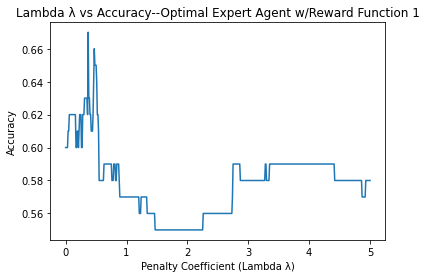

In [54]:
plt.plot(lambdas_list, all_accuracies[0])
plt.xlabel("Penalty Coefficient (Lambda λ)")
plt.ylabel("Accuracy")
plt.title("Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 1")

Question 12: (5 points) Use the plot in question 11 to compute the value of λ for which accuracy is maximum. For future reference we will denote this value as $λ_{max}^{(1)}$. Please report $λ_{max}^{(1)}$

In [55]:
acc_max1 = np.argmax(all_accuracies[0])
lambda_max1 = lambdas_list[acc_max1]
print('Max 1 Accuracy:', all_accuracies[0][acc_max1])
print('Max Lambda 1 Value:', lambda_max1)

Max 1 Accuracy: 0.67
Max Lambda 1 Value: 0.37


Question 13: (15 points) For $λ_{max}$, generate heat maps of the ground truth reward and the extracted reward. Please note that the ground truth reward is the Reward function 1 and the extracted reward is computed by solving the linear program given by equation 2 with the $λ$ parameter set to $λ_{max}$. In this question, you should have 2 plots.

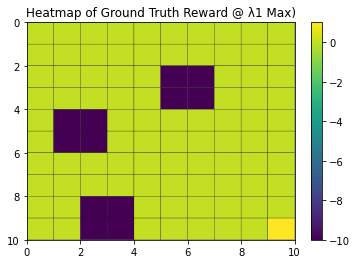

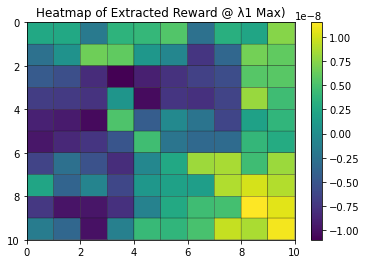

In [56]:
c, D, b = make_D_matrix(o_e, p, 0, gamma, lambda_max1, maximum)
irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
r_extracted = np.array(irl_solve['x'][:100]).reshape(10,10).T

#Plot heatmaps
plt.pcolor(reward_fnx1, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Ground Truth Reward @ λ1 Max)")
plt.show()

plt.pcolor(r_extracted, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Extracted Reward @ λ1 Max)")
plt.show()

Question 14: (10 points) Use the extracted reward function computed in question 13, to compute the optimal values of the states in the 2-D grid. For computing the optimal values you need to use the optimal state-value function that you wrote in question 2. For visualization purpose, generate a heat map of the optimal state values across the 2-D grid (similar to the figure generated in question 3). In this question, you should have 1 plot.

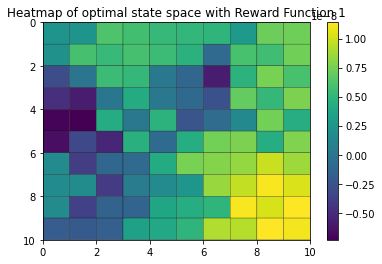

In [57]:
state, steps, _, _, _, _, _ = value_iteration(state_space,r_extracted,P_up,P_down,P_left,P_right,w,gamma,epsilon)

plt.pcolor(state,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state space with Reward Function 1")
plt.show()

Question 15: (10 points) Compare the heat maps of Question 3 and Question 14 and provide a brief explanation on their similarities and differences.

Both heatmaps are able to identify the highs and lows of the reward function well. Using the precise reward function as was done in Question 3 provided a sharper optimal state space where we can see the gradient towards the bottom right corner of high reward clearer. Using the extracted reward function as was done in Question 14, we can see that it is more patchy and not as smooth.  
  
After coordinating in office hours, it was determined that the pattern is still presen t here but the order of magnitude of the values used to create the heatmap are orders of magnitude smaller at around $10^{-8}$.

Question 16: (10 points) Use the extracted reward function found in question 13 to compute the optimal policy of the agent. For computing the optimal policy of the agent you need to use the function that you wrote in question 5. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The actions should be displayed using arrows. In this question, you should have 1 plot.

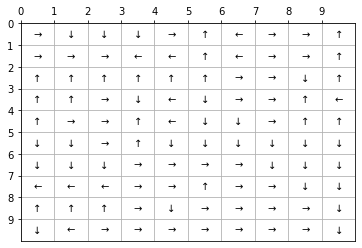

In [58]:
policy = find_policy(state_space, r_extracted, P_up, P_down, P_left, P_right, w, gamma, epsilon)

Question 17: (10 points) Compare the figures of Question 5 and Question 16 and provide a brief explanation on their similarities and differences.

In both figures, we can see that the arrows lead to the reward of high value and away from the reward of low value. However, in Question 16 using the extracted reward function, we see some errors with some arrows pointing away from the high reward.

Question 18: (30 points) Sweep λ from 0 to 5 to get 500 evenly spaced values for λ. For each value of λ compute $O_A(s)$ by following the process described above. For this problem, use the optimal policy of the agent found in question 8 to fill in the $O_E(s)$ values. Then use equation 3 to compute the accuracy of the IRL algorithm for this value of λ. You need to repeat the above process for all 500 values of λ to get 500 data points. Plot λ (x-axis) against Accuracy (y-axis). In this question, you should have 1 plot.

In [9]:
maximum = [1,10]
lambdas_list = np.arange(0,5.01,0.01)
all_accuracies = []
ind = 0   
while(ind < 2):
    accuracy_list = []
    for i, lam in enumerate(lambdas_list):
        c, D, b = make_D_matrix(o_e, p, ind, gamma, lam, maximum)
        solvers.options['show_progress'] = False
        irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
        R_pred = np.array(irl_solve['x'][:100])
        _, policy_pred = find_policy_irl(state_space, R_pred, P_up, P_down, P_left, P_right, w, gamma, epsilon)  

        #Solve for accuracy
        best_acc = np.sum(arrows2 == policy_pred)/policy_pred.size
        accuracy_list.append(best_acc)
    all_accuracies.append(accuracy_list)
    ind = ind + 1

Text(0.5, 1.0, 'Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 2')

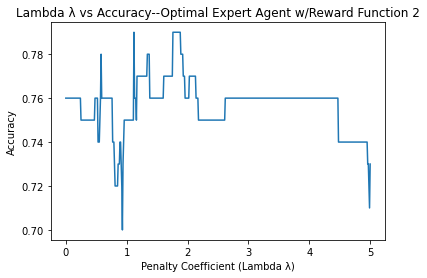

In [131]:
plt.plot(lambdas_list, accuracy_list)
plt.xlabel("Penalty Coefficient (Lambda λ)")
plt.ylabel("Accuracy")
plt.title("Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 2")

Question 19: (5 points) Use the plot in question 18 to compute the value of λ for which accuracy is maximum. For future reference we will denote this value as $λ_{max}^{(2)}$. Please report $λ_{max}^{(2)}$

In [133]:
acc_max2 = np.argmax(all_accuracies[1])
lambda_max2 = lambdas_list[acc_max2]
print('Max 2 Accuracy:', all_accuracies[1][acc_max2])
print('Max Lambda 2 Value:', lambda_max2)

Max 2 Accuracy: 0.79
Max Lambda 2 Value: 1.12


Question 20: (15 points) For $λ_{max}^{(2)}$, generate heat maps of the ground truth reward and the extracted reward. Please note that the ground truth reward is the Reward function 2 and the extracted reward is computed by solving the linear program given by equation 2 with the λ parameter set to $λ_{max}^{(2)}$. In this question, you should have 2 plots.

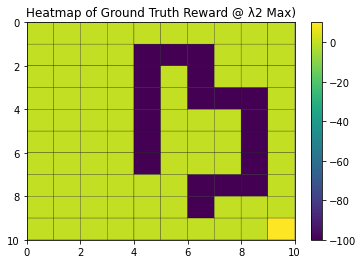

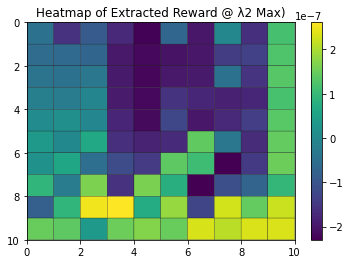

In [62]:
c, D, b = make_D_matrix(o_e, p, 1, gamma, lambda_max2, maximum)
irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
r_extracted = np.array(irl_solve['x'][:100]).reshape(10,10).T

#Plot heatmaps
plt.pcolor(reward_fnx2, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Ground Truth Reward @ λ2 Max)")
plt.show()

plt.pcolor(r_extracted, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Extracted Reward @ λ2 Max)")
plt.show()

Question 21: (10 points) Use the extracted reward function computed in question 20, to compute the optimal values of the states in the 2-D grid. For computing the optimal values you need to use the optimal state-value function that you wrote in question 2. For visualization purpose, generate a heat map of the optimal state values across the 2-D grid (similar to the figure generated in question 7). In this question, you should have 1 plot.

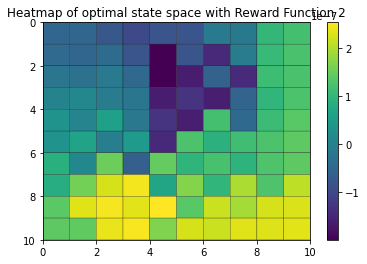

In [63]:
state, steps, _, _, _, _, _ = value_iteration(state_space,r_extracted,P_up,P_down,P_left,P_right,w,gamma,epsilon)

plt.pcolor(state,edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of optimal state space with Reward Function 2")
plt.show()

Question 22: (10 points) Compare the heat maps of Question 7 and Question 21 and provide a brief explanation on their similarities and differences.

Using the precise reward function as was done in Question 7, the optimal state space clearly reflected the effects of the reward function -- however, using the extracted reward function as was done in Question 21, it seems that some information was not captured correctly since the highest values in the state space don't align with the highest reward.

Question 23: (10 points) Use the extracted reward function found in question 20 to compute the optimal policy of the agent. For computing the optimal policy of the agent you need to use the function that you wrote in question 9. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal action at that state. The actions should be displayed using arrows. In this question, you should have 1 plot.

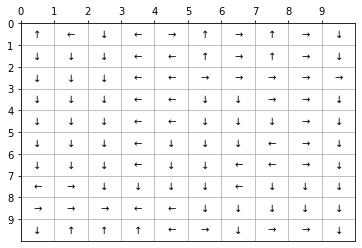

In [64]:
policy = find_policy(state_space, r_extracted, P_up, P_down, P_left, P_right, w, gamma, epsilon)

Question 24: (10 points) Compare the figures of Question 9 and Question 23 and provide a brief explanation on their similarities and differences.

In the figure from Question 9 corresponding to the precise reward function, we could see that the arrows clearly led to the highest reward and steered clear of low rewards. This is not what we see in the figure from Question 23 using the extracted reward function. The arrows are haphazardly scattered throughout the grid and seem to converge at some random points. This aligns with what was seen in the heatmap of the optimal state space. It reflects a couple discrepancies in the process, specifically deadlocks between two states and going off the grid.

Question 25: (50 points) From the figure in question 23, you should observe that the optimal policy of the agent has two major discrepancies. Please identify and provide the causes for these two discrepancies. One of the discrepancy can be fixed easily by a slight modification to the value iteration algorithm. Perform this modification and re-run the modified value iteration algorithm to compute the optimal policy of the agent. Also, recompute the maximum accuracy after this modification. Is there a change in maximum accuracy? The second discrepancy is harder to fix and is a limitation of the simple IRL algorithm.

The discrepancies are as follows:  
1. A loop forms among sub-optimal states and hence the agent never reaches the maximum reward values. In the simplest case, this shows up in the optimal policy arrow plots as two arrows facing each other.
2. There are actions at the boundary that go off the grid. This appears as arrows that point outside the grid in the optimal policy arrow plots.  
  
It is difficult to handle discrepancy 1 but one way to try to get rid of the loops is to reduce epsilon, the error tolerance, from 0.01 to $10^{-12}$ while iterating to find the best policy. For discrepancy 2, one way to get rid of the off-the-grid actions is to set the state values of the edge states to -$\infty$. As can be seen in the results below, discrepancy 1 is still present even after changing epsilon.

In [2]:
# Probabiliy transition matrix for moving from one state to another
def state_transition_probabilities(w):
    P_up= np.zeros((100,100)) #Up
    P_down= np.zeros((100,100)) #Down
    P_left= np.zeros((100,100)) #Left
    P_right= np.zeros((100,100)) #Right
 
    for i in range(0,100):
        if(i%10==0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i-1]=1-w+w/4
        if(i-10<0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i-10]=w/4
        if(i+10>99):
            P_up[i][i]+=w/4
        else:
            P_up[i][i+10]=w/4
        if((i+1)%10==0):
            P_up[i][i]+=w/4
        else:
            P_up[i][i+1]=w/4
        if(i%10==0):                     
            P_up[i][i]+=1-w   
        
    for i in range(0,100):
        if(i%10==0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i-1]=w/4
        if(i-10<0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i-10]=w/4
        if(i+10>99):
            P_down[i][i]+=w/4
        else:
            P_down[i][i+10]=w/4
        if((i+1)%10==0):
            P_down[i][i]+=w/4
        else:
            P_down[i][i+1]=1-w+w/4
        if((i+1)%10==0):                      
            P_down[i][i]+=1-w
    
    for i in range(0,100):
        if(i%10==0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i-1]=w/4
        if(i-10<0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i-10]=1-w+w/4
        if(i+10>99):
            P_left[i][i]+=w/4
        else:
            P_left[i][i+10]=w/4
        if((i+1)%10==0):
            P_left[i][i]+=w/4
        else:
            P_left[i][i+1]=w/4
        if(i-10<0):                      
            P_left[i][i]+=1-w

    for i in range(0,100):
        if(i%10==0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i-1]=w/4
        if(i-10<0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i-10]=w/4
        if(i+10>99):
            P_right[i][i]+=w/4
        else:
            P_right[i][i+10]=1-w+w/4
        if((i+1)%10==0):
            P_right[i][i]+=w/4
        else:
            P_right[i][i+1]=w/4
        if(i+10>99):                      
            P_right[i][i]+=1-w

    return P_up, P_down, P_left, P_right


# Value iteration algo.
def value_iteration(state_space,reward_fnx,P_up, P_down, P_left, P_right,w,gamma,epsilon):
    current_state=np.zeros(100)
    delta=np.inf
    r = (reward_fnx.T).ravel()
    steps = 0
    while(delta>epsilon):
        delta=0
        prev=np.copy(current_state)
        for s in range(0,100):
            up=np.sum(P_up[s]*(r+gamma*prev))
            down=np.sum(P_down[s]*(r+gamma*prev))
            left=np.sum(P_left[s]*(r+gamma*prev))
            right=np.sum(P_right[s]*(r+gamma*prev))
            current_state[s]=max(up,down,right,left)
            delta=max(delta,abs(prev[s]-current_state[s]))
        steps+=1
    copy_of_state = current_state.copy()
    current_state = np.transpose(current_state.reshape(10,10))
    return current_state, steps,up,down,left,right,copy_of_state

# Function for plotting the arrows given the action matrix
def plot_arrow(action_matrix):
    
    fig, ax = plt.subplots()
    num_rows = len(action_matrix)
    min_val, max_val = 0, num_rows

    for i in range(num_rows):
        for j in range(num_rows):
            c = action_matrix[j][i]
            arrow = ''
            if(c == 0):
                arrow = u'↑'
            elif(c == 1):
                arrow = u'↓'
            elif(c == 2):
                arrow = u'←'
            else:
                arrow = u'→'
            
            ax.text(i + 0.5, j + 0.5, arrow, va='center', ha='center')

    ax.set_xlim(min_val, max_val)
    ax.set_ylim(max_val, min_val)
    ax.set_xticks(np.arange(max_val))
    ax.set_yticks(np.arange(max_val))
    ax.xaxis.tick_top()
    ax.grid()


# Computing the optimal policy and plotting it    
def find_policy(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon):
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (reward_fnx.T).ravel()
    _,_,up,down,left,right,current_state = value_iteration(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon)
    for s in range(0,100):
        up=np.sum(P_up[s]*(r+gamma*current_state))
        down=np.sum(P_down[s]*(r+gamma*current_state))
        left=np.sum(P_left[s]*(r+gamma*current_state))
        right=np.sum(P_right[s]*(r+gamma*current_state))
        arr=[up,down,left,right]
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    plot_arrow(arrows)
    return policy


# Computing the optimal policy and not plot it
def find_policy_irl(state_space, reward_fnx, P_up, P_down, P_left, P_right, w, gamma, epsilon): 
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (reward_fnx.T).ravel()
    _,_,up,down,left,right,current_state = value_iteration(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon)
    for s in range(0,100):
        up=np.sum(P_up[s]*(r+gamma*current_state))
        down=np.sum(P_down[s]*(r+gamma*current_state))
        left=np.sum(P_left[s]*(r+gamma*current_state))
        right=np.sum(P_right[s]*(r+gamma*current_state))
        arr=[up,down,left,right]
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    return policy, arrows

# Modified policy to stop out of the grid actions
def find_policy_modified(state_space, reward_fnx, P_up, P_down, P_left, P_right, w, gamma, epsilon): #no plotting for faster runtime
    policy=np.zeros(100)
    arrows=np.zeros(100) 
    r = (reward_fnx.T).ravel()
    _,_,up,down,left,right,current_state = value_iteration(state_space,reward_fnx,P_up,P_down,P_left,P_right,w,gamma,epsilon)
    for s in range(0,100):
        up=np.sum(P_up[s]*(r+gamma*current_state))
        down=np.sum(P_down[s]*(r+gamma*current_state))
        left=np.sum(P_left[s]*(r+gamma*current_state))
        right=np.sum(P_right[s]*(r+gamma*current_state))
        arr=[up,down,left,right]
        
        #right end
        if(s >= 90):
            arr[0] = -np.inf
        
        #left end
        if(s <= 9):
            arr[1] = -np.inf
        
        # top end
        if((s % 10) == 0):
            arr[2] = -np.inf
            
        # bottom end
        if((s % 10) == 9):
            arr[3] = -np.inf
        
        policy[s]=np.amax(arr)
        arrows[s]=arr.index(np.amax(arr))
    arrows = np.transpose(arrows.reshape(10,10))
    policy = np.transpose(policy.reshape(10,10))
    return policy, arrows



# Prepare the matrices for the LP solver
def make_D_matrix(o_e, p, ind, gamma, lam, maximum):    
    #initialize empty matricies
    I = np.identity(100)
    zero = np.zeros((300,100))
    identity = np.zeros((300,100))

    counter = 0
    for i in range(100):
        best_p = int(o_e[ind][i])
        for j in range(len(p)):
            if(best_p == j):
                continue
            pa1 = p[best_p]
            pa = p[j]
            inv = np.linalg.inv(I - gamma*pa1)
            zero[counter, :] = np.matmul((pa1[i] - pa[i]).reshape(1,100), inv)
            identity[counter, i] = 1
            counter = counter + 1
    #Initialize the matricies    
    ones = np.zeros((100,1)) + 1
    zero = -zero

    reward = np.vstack((zero, zero, -I, I, I, -I))
    c = np.vstack((np.zeros((100,1)), ones, -lam*ones))
    D = np.hstack((reward, np.vstack((identity, np.zeros((700,100)))), np.vstack((np.zeros((600,100)), -I, -I, np.zeros((200,100))))))

    Rmax = np.zeros((100,1)) + maximum[ind]
    b = np.vstack((np.zeros((800,1)), Rmax, Rmax))
    return c, D, b

# Computing the accuracy
def accuracy(policy_pred,p):
    best_acc = 0
    for i in range(len(np.transpose(policy_pred).flatten())):
        if (np.transpose(policy_pred).flatten()[i] == p[i]):
            best_acc = best_acc + 1
    best_acc = best_acc/100.0
    return best_acc






In [5]:
# Defining the Reward functions 1 and 2

reward_fnx1 = np.array([[0,0,0,0,0,0,0,0,0,0], 
         [0,0,0,0,0,0,0,0,0,0], 
         [0,0,0,0,0,-10,-10,0,0,0], 
         [0,0,0,0,0,-10,-10,0,0,0],
         [0,-10,-10,0,0,0,0,0,0,0],
         [0,-10,-10,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0],
         [0,0,0,0,0,0,0,0,0,0],
         [0,0,-10,-10,0,0,0,0,0,0],
         [0,0,-10,-10,0,0,0,0,0,1]])

reward_fnx2 = np.array([[0,0,0,0,0,0,0,0,0,0], 
         [0,0,0,0,-100,-100,-100,0,0,0], 
         [0,0,0,0,-100,0,-100,0,0,0], 
         [0,0,0,0,-100,0,-100,-100,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,-100,0,0,0,-100,0],
         [0,0,0,0,0,0,-100,-100,-100,0],
         [0,0,0,0,0,0,-100,0,0,0],
         [0,0,0,0,0,0,0,0,0,10]])

In [7]:
# Computing the optimal expert policy using the reward functions 1 and 2

w = 0.1
gamma = 0.8
epsilon = 1e-12

k=0
state_space = np.zeros((10,10))
for i in range(0,10):
    for j in range(0,10):
        state_space[j][i]=k
        k+=1
        
P_up, P_down, P_left, P_right = state_transition_probabilities(w)
p = [P_up, P_down, P_left, P_right]

policy1, arrows1 = find_policy_modified(state_space, reward_fnx1, P_up, P_down, P_left, P_right, w, gamma, epsilon)
policy2, arrows2 = find_policy_modified(state_space, reward_fnx2, P_up, P_down, P_left, P_right, w, gamma, epsilon)
o_e = [arrows1.T.flatten(), arrows2.T.flatten()] #Optimal Policy array of Expert agent

In [124]:
#Compare penalty coefficient (lambda) and accuracy of the optimal polcies with Reward function 2
maximum = [1,10]
lambdas_list = np.arange(0,5.01,0.01)
all_accuracies = []
ind = 0   
while(ind < 2):
    accuracy_list = []
    for i, lam in enumerate(lambdas_list):
        c, D, b = make_D_matrix(o_e, p, ind, gamma, lam, maximum)
        solvers.options['show_progress'] = False
        irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
        R_pred = np.array(irl_solve['x'][:100])
        _, policy_pred = find_policy_modified(state_space, R_pred, P_up, P_down, P_left, P_right, w, gamma, epsilon)  

        #Solve for accuracy
        best_acc = np.sum(arrows2 == policy_pred)/policy_pred.size
        accuracy_list.append(best_acc)
    all_accuracies.append(accuracy_list)
    ind = ind + 1

Text(0.5, 1.0, 'Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 2')

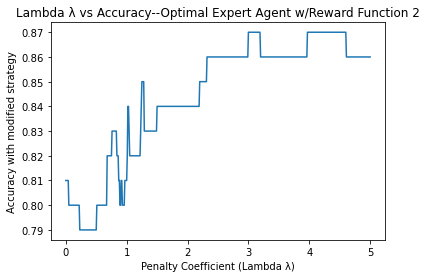

In [125]:
#Plot lambda vs accuracies
plt.plot(lambdas_list, all_accuracies[1])
plt.xlabel("Penalty Coefficient (Lambda λ)")
plt.ylabel("Accuracy with modified strategy")
plt.title("Lambda λ vs Accuracy--Optimal Expert Agent w/Reward Function 2")

In [126]:
acc_max2 = np.argmax(all_accuracies[1])
lambda_max2 = lambdas_list[acc_max2]
print('Max 2 Accuracy:', all_accuracies[1][acc_max2])
print('Max Lambda 2 Value:', lambda_max2)

Max 2 Accuracy: 0.87
Max Lambda 2 Value: 3.0


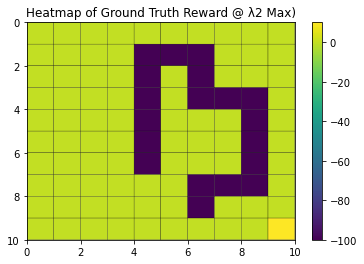

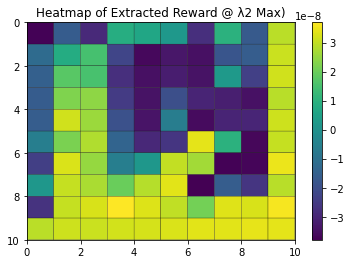

In [127]:
#get the reward function for the extracted reward at reward 2 max
c, D, b = make_D_matrix(o_e, p, 1, gamma, lambda_max2, maximum)
irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
r2 = np.array(irl_solve['x'][:100]).reshape(10,10).T

#Plot heatmaps
plt.pcolor(reward_fnx2, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Ground Truth Reward @ λ2 Max)")
plt.show()

plt.pcolor(r2, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Extracted Reward @ λ2 Max)")
plt.show()

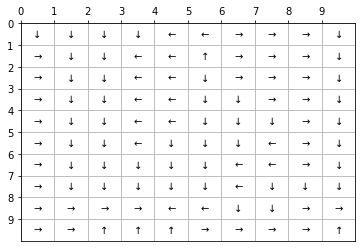

In [128]:
policy = find_policy(state_space, r2, P_up, P_down, P_left, P_right, w, gamma, epsilon)

One possible way to get rid of the deadlock in a generalizable manner could be to change the lambda value to not be the optimal value. Below are the results after changing it to 2.0:

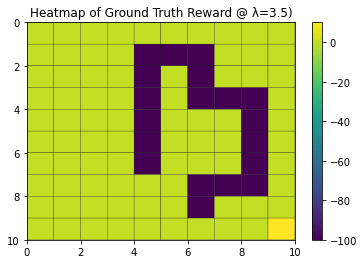

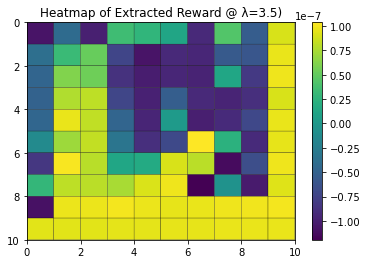

In [16]:
#get the reward function for the extracted reward at reward 2 max
c, D, b = make_D_matrix(o_e, p, 1, gamma, 0.5, maximum)
irl_solve = solvers.lp(matrix(c), matrix(D), matrix(b))
r2 = np.array(irl_solve['x'][:100]).reshape(10,10).T

#Plot heatmaps
plt.pcolor(reward_fnx2, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Ground Truth Reward @ λ=3.5)")
plt.show()

plt.pcolor(r2, edgecolors='black')
plt.gca().invert_yaxis()
plt.colorbar()
plt.title("Heatmap of Extracted Reward @ λ=3.5)")
plt.show()

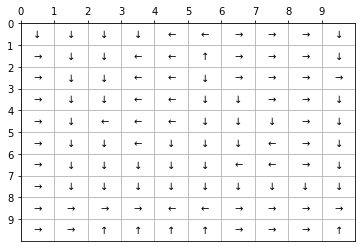

In [17]:
policy = find_policy(state_space, r2, P_up, P_down, P_left, P_right, w, gamma, epsilon)

Even close to the lowest accuracy region when $\lambda=0.5$, deadlock still appears. 